In [29]:
import pandas as pd

import numpy as np


df = pd.read_csv('../cleaned_data/combined.csv')
# drop all nan values on columns: amusement,awe,contentment,excitement,anger,disgust,fear,sadness,something else (float)
df = df.dropna(subset=['amusement','awe','contentment','excitement','anger','disgust','fear','sadness','something else'])

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer


# run pca on columns: amusement,awe,contentment,excitement,anger,disgust,fear,sadness,something else (float)
pca = PCA(n_components=3)
scaler = StandardScaler()

# normalize data
df['amusement'] = scaler.fit_transform(df[['amusement']])
df['awe'] = scaler.fit_transform(df[['awe']])
df['contentment'] = scaler.fit_transform(df[['contentment']])
df['excitement'] = scaler.fit_transform(df[['excitement']])
df['anger'] = scaler.fit_transform(df[['anger']])
df['disgust'] = scaler.fit_transform(df[['disgust']])
df['fear'] = scaler.fit_transform(df[['fear']])
df['sadness'] = scaler.fit_transform(df[['sadness']])
df['something else'] = scaler.fit_transform(df[['something else']])

# run pca
pca.fit(df[['amusement','awe','contentment','excitement','anger','disgust','fear','sadness','something else']])
pca_data = pca.transform(df[['amusement','awe','contentment','excitement','anger','disgust','fear','sadness','something else']])


In [30]:
df.count()
print(pca_data.shape)

(81591, 3)


In [31]:
# add pca data to dataframe

df['pca1'] = pca_data[:,0]
df['pca2'] = pca_data[:,1]
df['pca3'] = pca_data[:,2]


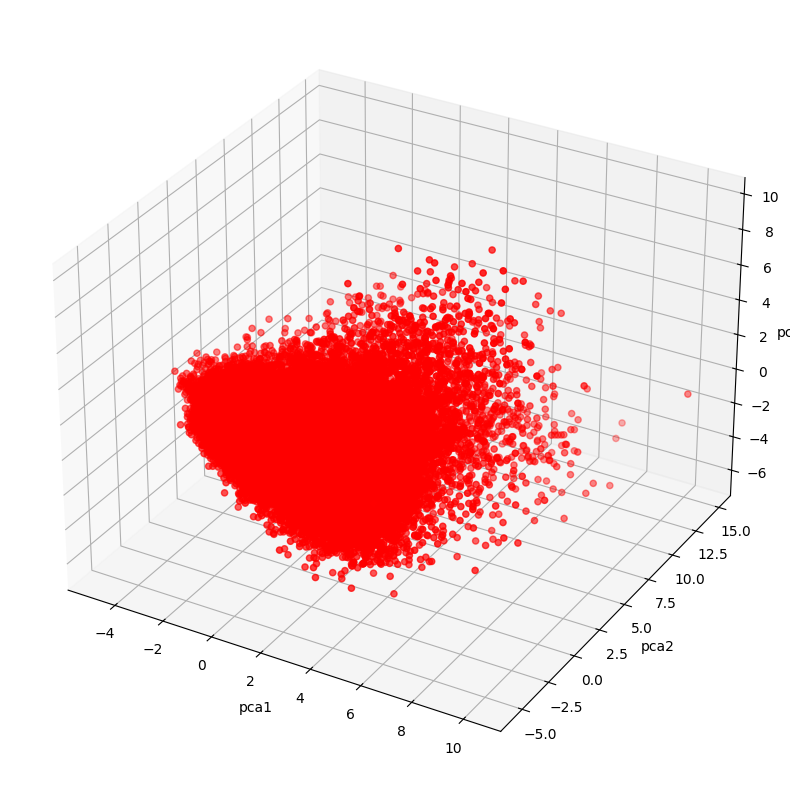

In [32]:
# plot 3d scatter plot

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

x = df['pca1']
y = df['pca2']
z = df['pca3']

ax.scatter(x, y, z, c='r', marker='o')

ax.set_xlabel('pca1')
ax.set_ylabel('pca2')
ax.set_zlabel('pca3')

plt.show()

In [ ]:
df.to_csv('../cleaned_data/combined_pca.csv', index=False)